Found 14362 images belonging to 5 classes.
Found 1311 images belonging to 5 classes.
Classes: {'heart': 0, 'long': 1, 'oval': 2, 'round': 3, 'square': 4}


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.2267 - loss: 1.7509 - val_accuracy: 0.2883 - val_loss: 1.6267 - learning_rate: 5.0000e-04
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 731s 2s/step - accuracy: 0.2855 - loss: 1.5708 - val_accuracy: 0.3188 - val_loss: 1.5614 - learning_rate: 5.0000e-04
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 638s 1s/step - accuracy: 0.3246 - loss: 1.5335 - val_accuracy: 0.2067 - val_loss: 1.9772 - learning_rate: 5.0000e-04
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 636s 1s/step - accuracy: 0.3456 - loss: 1.4838 - val_accuracy: 0.3043 - val_loss: 1.5240 - learning_rate: 5.0000e-04
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 656s 1s/step - accuracy: 0.4040 - loss: 1.4031 - val_accuracy: 0.4127 - val_loss: 1.3759 - learning_rate: 5.0000e-04
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 646s 1s/step - accuracy: 0.4537 - loss: 1.3063 - val_accuracy: 0.3707 - val_loss: 1.4019 - learning_rate: 5.0000e-04
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.53

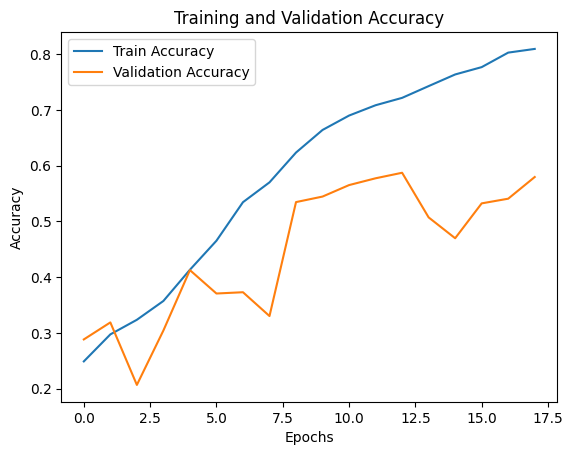

41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 317ms/step - accuracy: 0.5707 - loss: 1.1892
Test Accuracy: 0.5873


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Define dataset paths
train_dir = "C:/Users/HP/Desktop/facee/ds/train"
test_dir = "C:/Users/HP/Desktop/facee/ds/test"

# Image parameters
img_size = 128  # Resize all images to (128, 128)
batch_size = 32

# Data Augmentation (reduced distortions)
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
    validation_split=0.20
)

# Rescale test data (No augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# Get number of classes
num_classes = len(train_generator.class_indices)
print("Classes:", train_generator.class_indices)

# Improved CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),  # Instead of Flatten()
    
    Dense(256, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(num_classes, activation='softmax')
])

# Compile the model with better settings
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks to improve training
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
]

# Train the model
epochs = 30
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, callbacks=callbacks)

# Save the model
model.save("face_sha.h5")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator) 
print(f"Test Accuracy: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
Predicted Face Shape: round


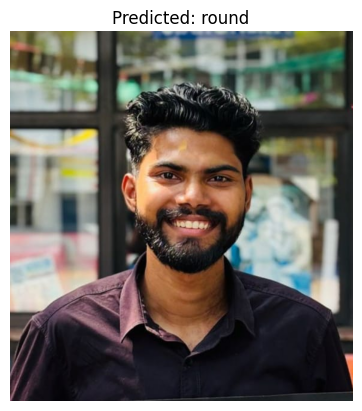

In [3]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("face_sha.h5")

# Define class labels (make sure these match the training dataset)
class_labels = ['heart', 'oblong', 'oval', 'round', 'square']  # Adjust as needed

# Load and preprocess the image
def preprocess_image(image_path, img_size=128):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Error: Could not load image. Check the path!")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (img_size, img_size))
    image = img_to_array(image) / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Expand dims to match model input
    return image

image_path = "C:/Users/HP/Downloads/joy.jpg"  # Replace with actual test image
processed_image = preprocess_image(image_path)

# Make prediction
prediction = model.predict(processed_image)

if prediction is not None:
    predicted_class = np.argmax(prediction)  # Get the index of the highest probability
    predicted_label = class_labels[predicted_class]
    print(f"Predicted Face Shape: {predicted_label}")

    # Display image with prediction
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label}")
    plt.show()
else:
    print("Error: Model did not return any prediction!")

